# Introduction to Data Visualisation

© EXPLORE Data Science Academy

## Learning Objectives
In this train you will learn how to:

* Implement various plotting techniques using Python's matplotlib package.
* Distinguish between different types of graphs. 
* Understand how to best represent your data using a specific graph.
* Analyse and draw insight from graphs.

## Outcomes
This train is structured as follows:

* Introduction to graphs their various forms.
* Plotting graphs.
* Importing data and data preparation.
* Bar graphs and Pie charts. 
* Line graphs and Scatter plots.
* Conclusion.

## Introduction


Data visualisation is the process of representing data and information in a graphical format such as charts, maps and diagrams. The objective of these visuals is to increase understanding of the underlying data; allowing patterns, trends, relationships and outliers to be recognised more readily than an inspection of the raw data alone can provide.    

There will be many situations where you will have to present your data driven findings and insights. Unfortunately, raw data are not well suited for this purpose. This is where harnessing the full potential of data visualisation becomes pivotal. In this train, you will learn how to visualise data using Python's graphing package `matplotlib`, as well as how to determine the best visualisation techniques to use based on the data you are presented with.

## Different Kinds of Charts:

There are many different ways to represent the same data, and the choice of visualisation affects what information is conveyed to the audience. In this train, we will walk you through some of the most basic (yet useful and reliable) chart options. Below is an image depicting some of the most popular charts used for data visualisation. 


<center><img src="https://github.com/Explore-AI/Pictures/blob/d984eb95acf59f0f4ca2d8fa5dfbc9a0326deff2/Introduction_to_data_visualisation.png?raw=true" style="float: center; padding-bottom=0.5em" width=80%/></center>

## Plotting Graphs

In this section, we'll learn how to plot some of these graphs in Python using the `matplotlib` library.

We will begin by importing some commonly used Python libraries. 

In [1]:
# Import libraries 
import matplotlib.pyplot as plt #used for plotting data 
import numpy as np #used for mathematical operations
import pandas as pd #used to loading CSV data

### Import data

For this train, we will be using [the tips](https://www.kaggle.com/jsphyg/tipping) dataset, which consists of customer tip data collected over a period of two and half months in early 1990 from one restaurant by a food server.

Let's go ahead and import our data.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/tips.csv")

### Data preparation

In [3]:
df.head() #First 5 rows of data 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
title_day = df.groupby('day').sum() #group and sum data by the number of values for each ‘day’ category
print(title_day)

      total_bill     tip  size
day                           
Fri       325.88   51.96    40
Sat      1778.40  260.40   219
Sun      1627.16  247.39   216
Thur     1096.33  171.83   152


In [6]:
week_day = title_day.total_bill.sort_values().index #sort the indices 
bill = title_day.total_bill.sort_values() 

In [6]:
print(bill)

day
Fri      325.88
Thur    1096.33
Sun     1627.16
Sat     1778.40
Name: total_bill, dtype: float64


### Bar graph

From the data provided, we can find out which days of the week the restaurant was the busiest and made the most amount of money. 
We can visualise this data using a bar graph as follows:

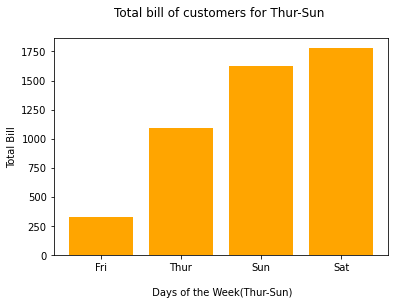

In [7]:
# Plot total bill (y-axis) for day of the week (x-axis) 
# We only have to call a single line of code from matplotlib to produce the base graph. 
plt.bar(week_day, bill, color= 'orange')

# Set x and y axis titles
plt.ylabel('Total Bill')
plt.xlabel('\n Days of the Week(Thur-Sun)') # Note: '\n' creates a newline (try removing it and see what happens)  

# Set graph title
plt.title('Total bill of customers for Thur-Sun \n')

# Show graph
plt.show()

**Analysis**: From the bar graph, we can see that the restaurant makes most of its money on the weekend. This is expected as Saturday and Sunday are usually the busiest days of the week for restaurants as people are off from work.  

### Pie chart

Next, we will plot a **pie chart** showing the proportion of the total meals served at the restaurant, and determine during which mealtime the server earned the most in tips.  

In [7]:
title_time = df.groupby('time').sum() # Group and sum data by the number of values for each ‘time’ category
print(title_time)

        total_bill     tip  size
time                            
Dinner     3660.30  546.07   463
Lunch      1167.47  185.51   164


In [8]:
meal_time = title_time.tip.sort_values().index #Sort the indices 
tips = title_time.tip.sort_values() 

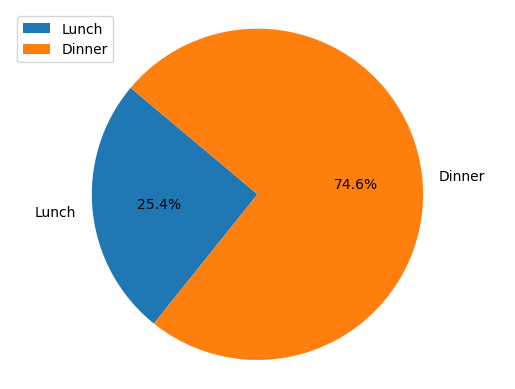

In [9]:
# Plot a pie chart
# The `autopct` argument defines the format applied to the data labels. 
# The `startangle` argument determines which point in the pie to start plotting proportions from. 
# Full plot documentation can be found here: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html 
plt.pie(tips, labels = meal_time, autopct='%1.1f%%',  startangle=140)

# Place the chart legend in a position which does not overlap with other components. 
plt.legend(loc="best")
plt.axis('equal')
plt.show()

### Pie vs Donut charts

Donut charts are quite similar to pie charts except they contain a hole in its center, and displays categories as arcs rather than slices. Donut charts are considered easier to interpret visually in comparison to pie charts. Let's visualise the same data using a **donut chart**. 

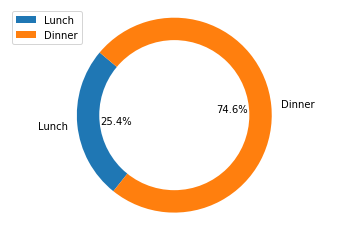

In [11]:
#Plot a donut chart

# Initially we create a pie chart as the base of our donut chart. 
plt.pie(tips, labels=meal_time, autopct='%1.1f%%', startangle=140)

# Next, we create a circle at the center of the base plot
centre_circle = plt.Circle((0,0),0.77, fc='white',linewidth=1.25)
fig = plt.gcf() # <-- Matplotlib command to get the current figure for further manipulation. 
# Add the circle to our base pie chart
fig.gca().add_artist(centre_circle)

plt.legend(loc="best")
plt.axis('equal')
plt.show()

**Analysis**: From both the pie and donut chart, we can see that Dinner was definitely the most profitable meal time for the server. 

Having learnt how to plot both pie and donut charts you can now use personal preference to decide which is more visually appealing and easy to interpret in your own data analysis projects. 

### Line graph

Suppose we now want to see how many meals were sold over 6 months at this busy restaurant. We can go ahead and a create a dictionary of this information based on the `total_meals` sold at the restaurant from January to June 1990.  

In [10]:
total_meals = {'31/01/1990': 1340, '28/02/1990': 1338, '31/03/1990': 1330, '30/04/1990': 1328, '31/05/1990': 1335, '30/06/1990': 1335}

To visualise this data we can use a **line graph**:

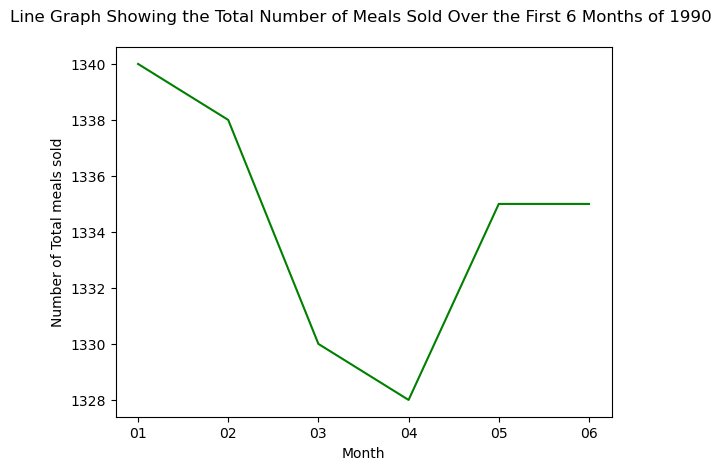

In [11]:
dates = list(total_meals.keys()) # Extract the dates (the dictionary keys of our data in this case)
x_ax = [date[3:5] for date in dates] # Extract the month from each date string
y_ax = list(total_meals.values()) # Extract the total number of meals consumed on each date as a Python list

# Plot the line graph
plt.plot(x_ax, y_ax, color='green') 

# Set axis and graph titles
plt.xlabel('Month')
plt.ylabel('Number of Total meals sold')
plt.title('Line Graph Showing the Total Number of Meals Sold Over the First 6 Months of 1990 \n')

plt.show()

**Analysis**: From the line plot, we observe successive decreases in the number of meals sold from January to April, with this last month representing the lowest number of sales. This is not coincidental as the Easter holidays are usually celebrated in April where people enjoy spending time with family and feasting on home cooked meals instead of going out. 

### Scatter plot
As a final visual analysis, we will investigate if there is a relationship between the size of a group which visits the restaurant and the amount that the server gets tipped from this group. We can visually consider this relationship using a **scatter plot**.

Scatter plots are a powerful form of visualisation which allow us to view many data points at once. Typically, two variables are considered for a given dataset, with x and y-axis cartesian coordinates being used to place markers representing the data.  Additional variables can also be represented by adding further visual properties to the markers,  such as modifying their size, shape or colour.    

In the case of our scatter plot, we seek to observe both the bill total and the associated tip received for each data entry, and to code these values based upon the related group size. We can use the first two variables for the plot's x and y-axis respectively, and can represent the group size variable by using different marker colours.        


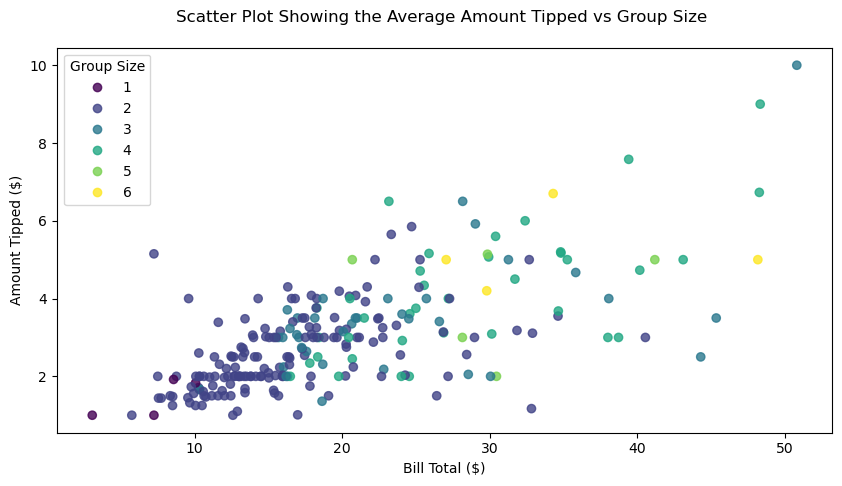

In [12]:
# For this plot, we need to access the underlying Axes object used to create our chart. 
# To display our data correctly, we also set the `figsize` argument to increase the size of the plot. 
fig, ax = plt.subplots(figsize=(10,5))

# Create the scatter plot, with the 'size' variable being coded as the marker colour. 
# We set the `alpha` parameter to make the markers slightly transparent to view overlapping points. 
scatter = ax.scatter(df['total_bill'], df['tip'], c=df['size'], alpha=0.8)

# We now create our legend based upon the underlying group size and colour assignments.
ax.legend(*scatter.legend_elements(), loc="best", title="Group Size")

# Set graph and axis titles
plt.title('Scatter Plot Showing the Average Amount Tipped vs Group Size \n')
plt.xlabel('Bill Total ($)')
plt.ylabel('Amount Tipped ($)')

plt.show()

In [13]:
df.head() #First 5 rows of data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
title_smoker = df.groupby('smoker').sum() #group and sum data by the number of values for each ‘day’ category
print(title_smoker)

        total_bill     tip  size
smoker                          
No         2897.43  451.77   403
Yes        1930.34  279.81   224


In [18]:
week_smoker = title_smoker.total_bill.sort_values().index #sort the indices 
bill = title_smoker.total_bill.sort_values() 

In [19]:
print(bill)

smoker
Yes    1930.34
No     2897.43
Name: total_bill, dtype: float64


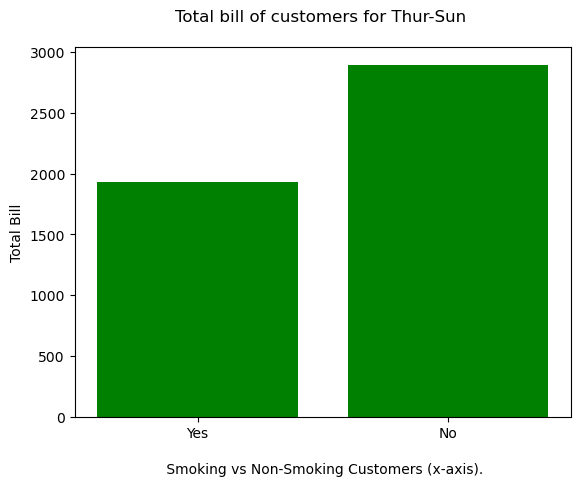

In [21]:
# Plot total bill (y-axis) for day of the week (x-axis) 
# We only have to call a single line of code from matplotlib to produce the base graph. 
plt.bar(week_smoker, bill, color= 'green')

# Set x and y axis titles
plt.ylabel('Total Bill')
plt.xlabel('\n Smoking vs Non-Smoking Customers (x-axis).') # Note: '\n' creates a newline (try removing it and see what happens)  

# Set graph title
plt.title('Total bill of customers for Thur-Sun \n')

# Show graph
plt.show()

In [ ]:
# yes its worth adding a smoking area, the smoking customer do add a significant money to the overall total bill,
# so it will be worth it for the resturant to add a smoking area.

**Analysis**: This chart holds much information! Firstly, we see a general trend that as the group size increases, so does the bill total and the amount tipped. Interestingly, the scatter plot fans out in a cone shape, indicating that as the bill increases there is also more variance in the tips produced. Lastly, it is also surprising to note that the highest tips produced come from mid-sized groups (3-4 individuals. This may represent a dynamic where larger groups tend to both order and tip less, based on the fact that the bill is either being generously picked up by one group member, or split by the group as a whole. It's important to note that this last point is an assumption, however, and cannot be supported by the chart alone - highlighting the need for further data driven analysis which often accompanies the evaluation of a visualisation.    

## Exercise 

The restaurant would like to add an extension to accommodate the expanding number of customers they anticipate will visit the restaurant during the festive season. In the expansion they have decided to increase the seating area for non-smoking customers but are uncertain if they should increase the area of the restaurant that is designated for smoking customers too. They have decided to use the data captured by the server to assist them in making this decision. 

Let's see if we can help them to make a decision based on the "Total bill"  racked up by the smoking and non-smoking customers to see if an extension to the smoking area of the restaurant is worth their while 

For this exercise you should do the following:

1. Group and sum data by the number of values for each `smoker` category
2. Sort the indices and values that you will use as your `y-axis` and `x-axis`
3. Plot a bar graph of the total bill (y-axis) for smoking vs non-smoking customers (x-axis).  


# Conclusion

In this train, we outlined some of the basic types of graphs and how to effectively use them. The following was covered:

* Understanding when to use a particular graph.
* Plotting graphs using the `matplotlib` library in Python.
* Interpreting graphs.

Learning how to properly represent your data to expose insights is undeniably one of the most essential skills that a data scientist should possess. We encourage you to use the skills that you have learnt from this train to visualisation data you find interesting. 

Good luck!

# Appendix
Links to additional resources to help with the understanding of concepts presented in the train: 

* [Types of graphs for data visualisation](https://blog.hubspot.com/marketing/types-of-graphs-for-data-visualization)

* [Data visualisation in Python](https://www.geeksforgeeks.org/data-visualization-different-charts-python/)